#📌 Extracción

In [33]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Importar Libreria
from google.colab import drive
drive.mount('/content/drive')
# Rutas Drive
path = '/content/drive/MyDrive/Colab Notebooks/TelecomX_Data.json'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Convertir la lista de diccionarios en un DataFrame
datos = pd.read_json(path)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [36]:
#Dimensiones del DataFrame:
datos.shape

(7267, 6)

In [37]:
# Columnas del DataFrame:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [38]:
# Información general del DataFrame:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [39]:
# Normalizar las columnas anidadas: 'customer', 'phone', 'internet' y 'account'
datos_customer = pd.json_normalize(datos['customer'])
datos_phone = pd.json_normalize(datos['phone'])
datos_internet = pd.json_normalize(datos['internet'])
datos_account = pd.json_normalize(datos['account'])

In [40]:
# Eliminar columnas anidadas originales y unir los nuevos DataFrames normalizados
datos = datos.drop(columns=['customer', 'phone', 'internet', 'account'])
datos_limpios = pd.concat([datos, datos_customer, datos_phone, datos_internet, datos_account], axis=1)
datos_limpios.shape
datos_limpios.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [41]:
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [42]:

datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [43]:
datos_limpios.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [44]:
# Normalizar los espacios vacíos en la columna 'Charges.Total'
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].replace(' ', np.nan)

In [45]:
# Contar cuántos valores vacíos o NaN hay
total_nulos = datos_limpios['Charges.Total'].isna().sum()
total_nulos

np.int64(11)

In [46]:
# Mostrar los registros con valores vacíos
if total_nulos > 0:
    vacios = datos_limpios[datos_limpios['Charges.Total'].isna()][['Charges.Total']]
vacios

,Charges.Total
975,NaN
1775,NaN
1955,NaN
2075,NaN
2232,NaN
2308,NaN
2930,NaN
3134,NaN
3203,NaN
4169,NaN


In [47]:
# Convertir la columna a tipo numérico (float), manejando errores
datos_limpios['Charges.Total'] = pd.to_numeric(datos_limpios['Charges.Total'], errors='coerce')

In [48]:
# Rellenar NaN con la media de la columna
media = datos_limpios['Charges.Total'].mean()
datos_limpios['Charges.Total'].fillna(media, inplace=True)

/tmp/ipython-input-3304005982.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_limpios['Charges.Total'].fillna(media, inplace=True)


In [49]:
datos_limpios['Charges.Total'].dtype

dtype('float64')

In [50]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [51]:
# Revisión general de valores nulos
datos_limpios.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [52]:
# También puedes revisar valores vacíos (strings vacíos o espacios)
(datos_limpios == '').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [53]:
# Mostrar solo columnas que tengan algún valor nulo o vacío
for col in datos_limpios.columns:
    nulls = datos_limpios[col].isnull().sum()
    empties = (datos_limpios[col] == '').sum()

    if nulls > 0 or empties > 0:
        print(f"{col}: {nulls} nulos, {empties} vacíos")


Churn: 0 nulos, 224 vacíos


In [60]:
columnas_ordenadas = [
    'customerID',
    'Churn', 'gender', 'SeniorCitizen','Partner', 'Dependents',
    'PhoneService','InternetService', 'MultipleLines', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PaymentMethod', 'Contract','OnlineSecurity']

In [61]:
for col in columnas_ordenadas:
  print(f"{col}: {datos_limpios[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
InternetService: ['DSL' 'Fiber optic' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Contract: ['One year' 'Month-to-month' 'Two year']
OnlineSecurity: ['No' 'Yes' 'No internet service']


In [62]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [63]:
datos_limpios = datos_limpios.query("Churn != ''")
datos_limpios = datos_limpios
datos_limpios['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [64]:
datos_limpios[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']].apply(lambda col: col.str.lower())
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003-mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month-to-month,No,mailed check,59.9,542.40
2,0004-tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month-to-month,Yes,electronic check,73.9,280.85
3,0011-igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month-to-month,Yes,electronic check,98.0,1237.85
4,0013-exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month-to-month,Yes,mailed check,83.9,267.40


In [66]:
# Asegurarse de que los datos sean de tipo string antes de aplicar el reemplazo
columnas_a_limpiar = ['customerID', 'gender', 'InternetService', 'PaymentMethod']

# Aplicar limpieza solo a columnas de texto
for col in columnas_a_limpiar:
    datos_limpios[col] = datos_limpios[col].astype(str).apply(lambda x: x.replace('-', '').replace(',', '').strip())

# Limpiar columna Contract
datos_limpios['Contract'] = datos_limpios['Contract'].astype(str).apply(lambda x: x.replace('-', ' ').strip())

# Ver los primeros registros para confirmar
datos_limpios.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,No,female,0,Yes,Yes,9,Yes,No,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.6,593.30
1,0003mknfe,No,male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,No,Yes,month to month,No,mailed check,59.9,542.40
2,0004tlhlj,Yes,male,0,No,No,4,Yes,No,fiber optic,...,No,Yes,No,No,No,month to month,Yes,electronic check,73.9,280.85
3,0011igkff,Yes,male,1,Yes,No,13,Yes,No,fiber optic,...,Yes,Yes,No,Yes,Yes,month to month,Yes,electronic check,98.0,1237.85
4,0013exchz,Yes,female,1,Yes,No,3,Yes,No,fiber optic,...,No,No,Yes,Yes,No,month to month,Yes,mailed check,83.9,267.40


In [67]:
datos_limpios['gender'] = datos_limpios['gender'].map({'male': 0, 'female': 1})
datos_limpios['InternetService'] = datos_limpios['InternetService'].map({'no': 0, 'dsl': 1, 'fiber optic': 2})
datos_limpios['Contract'] = datos_limpios['Contract'].map({'month to month': 0, 'one year': 1, 'two year': 2})

In [69]:
# Columnas binarias a convertir
columnas_binarias = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

# Reemplazar 'Yes' por 1 y 'No' por 0
datos_limpios[columnas_binarias] = datos_limpios[columnas_binarias].replace({'Yes': 1, 'No': 0})

# Convertir explícitamente a tipo entero (int8 para menor uso de memoria)
datos_limpios[columnas_binarias] = datos_limpios[columnas_binarias].astype('int64')

In [70]:
mapeo_servicios = {
    'No': 0,
    'Yes': 1,
    'No internet service': 0,
    'No phone service': 0
}
columnas_servicios = ['MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','OnlineSecurity']

for columna in columnas_servicios:
    datos_limpios[columna] = datos_limpios[columna].map(mapeo_servicios)


In [71]:
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,0,1,1,0,1,1,mailed check,65.6,593.30
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,0,0,1,0,0,mailed check,59.9,542.40
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,0,0,0,0,1,electronic check,73.9,280.85
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,1,0,1,1,0,1,electronic check,98.0,1237.85
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,1,0,0,1,mailed check,83.9,267.40


In [73]:
for columna in columnas_ordenadas:
    print(f"{columna}: {datos_limpios[columna].unique()}")

customerID: ['0002orfbo' '0003mknfe' '0004tlhlj' ... '9992ujoel' '9993lhieb'
 '9995hotoh']
Churn: [0 1]
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
InternetService: [1 2 0]
MultipleLines: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Contract: [1 0 2]
OnlineSecurity: [0 1]


In [74]:
datos_limpios['Cuentas_Diarias'] = datos_limpios['Charges.Monthly'] / 30

In [75]:
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,0,1,1,0,1,1,mailed check,65.6,593.30,2.186667
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,0,1,0,0,mailed check,59.9,542.40,1.996667
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,1,0,0,0,0,1,electronic check,73.9,280.85,2.463333
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,0,1,1,0,1,electronic check,98.0,1237.85,3.266667
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,1,1,0,0,1,mailed check,83.9,267.40,2.796667


In [76]:
datos_limpios = pd.get_dummies(datos_limpios, columns=['PaymentMethod'])
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,0,1,1,65.6,593.30,2.186667,False,False,False,True
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,1,0,0,59.9,542.40,1.996667,False,False,False,True
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,0,1,73.9,280.85,2.463333,False,False,True,False
3,0011igkff,1,0,1,1,0,13,1,0,2,...,1,0,1,98.0,1237.85,3.266667,False,False,True,False
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,0,1,83.9,267.40,2.796667,False,False,False,True


In [77]:
datos_limpios[['PaymentMethod_mailed check',
    'PaymentMethod_bank transfer (automatic)',
      'PaymentMethod_credit card (automatic)',
      'PaymentMethod_electronic check']].sum()

,0
PaymentMethod_mailed check,1612
PaymentMethod_bank transfer (automatic),1544
PaymentMethod_credit card (automatic),1522
PaymentMethod_electronic check,2365


In [78]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   Churn                                    7043 non-null   int64  
 2   gender                                   7043 non-null   int64  
 3   SeniorCitizen                            7043 non-null   int64  
 4   Partner                                  7043 non-null   int64  
 5   Dependents                               7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   MultipleLines                            7043 non-null   int64  
 9   InternetService                          7043 non-null   int64  
 10  OnlineSecurity                           7043 non-nul

In [79]:
servicios = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'OnlineBackup', 'DeviceProtection', 'PhoneService', 'MultipleLines']


datos_limpios['ServiciosContratados'] = datos_limpios[servicios].sum(axis=1)
datos_limpios.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,ServiciosContratados
0,0002orfbo,0,1,0,1,1,9,1,0,1,...,1,1,65.6,593.30,2.186667,False,False,False,True,4
1,0003mknfe,0,0,0,0,0,9,1,1,1,...,0,0,59.9,542.40,1.996667,False,False,False,True,3
2,0004tlhlj,1,0,0,0,0,4,1,0,2,...,0,1,73.9,280.85,2.463333,False,False,True,False,2
3,0011igkff,1,0,1,1,0,13,1,0,2,...,0,1,98.0,1237.85,3.266667,False,False,True,False,5
4,0013exchz,1,1,1,1,0,3,1,0,2,...,0,1,83.9,267.40,2.796667,False,False,False,True,3


In [80]:
datos_limpios['ServiciosContratados'].sample(20)

,ServiciosContratados
6424,4
1392,5
331,3
1856,1
215,4
6644,3
2817,3
4528,3
3614,6
1277,1


#📊 Carga y análisis

In [81]:
datos_limpios.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,ServiciosContratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,...,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,64.761692,2283.296277,2.158723,3.362914
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,...,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,30.090047,2265.000260,1.003002,2.062031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,1.183333,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1400.550000,2.345000,3.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,118.750000,8684.800000,3.958333,8.000000


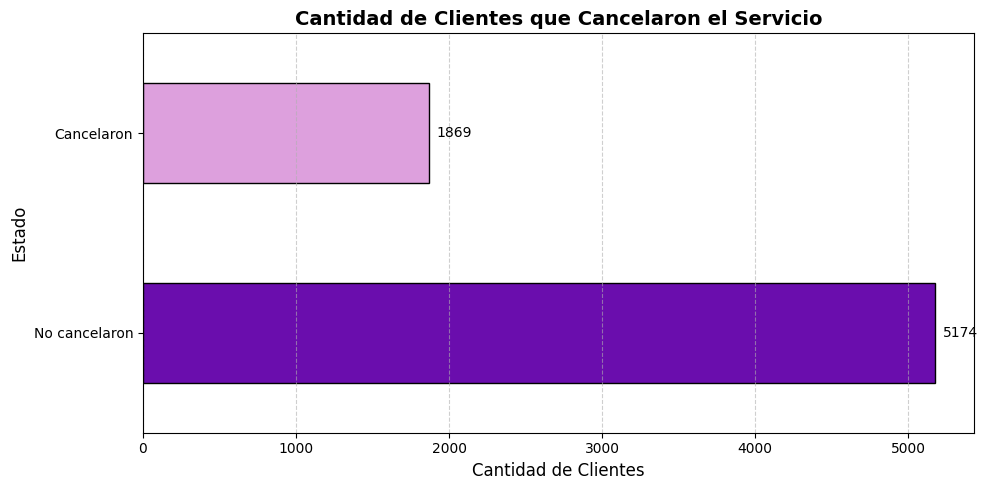

In [87]:
# Renombrar los valores 0 y 1 para mayor claridad
conteo = datos_limpios['Churn'].value_counts().rename(index={0: 'No cancelaron', 1: 'Cancelaron'})

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar la barra horizontal
bars = conteo.plot(
    kind='barh',
    ax=ax,
    color=['#6a0dad', '#dda0dd'],  # Purple y orchid en HEX para mejor control
    edgecolor='black'
)

# Título y etiquetas
ax.set_title('Cantidad de Clientes que Cancelaron el Servicio', fontsize=14, weight='bold')
ax.set_xlabel('Cantidad de Clientes', fontsize=12)
ax.set_ylabel('Estado', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Añadir etiquetas numéricas a las barras
for i, valor in enumerate(conteo):
    ax.text(valor + max(conteo)*0.01, i, str(valor), va='center', fontsize=10)

# Guardar la figura con alta resolución
fig.savefig('distribucion_cancelacion.png', transparent=False, dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


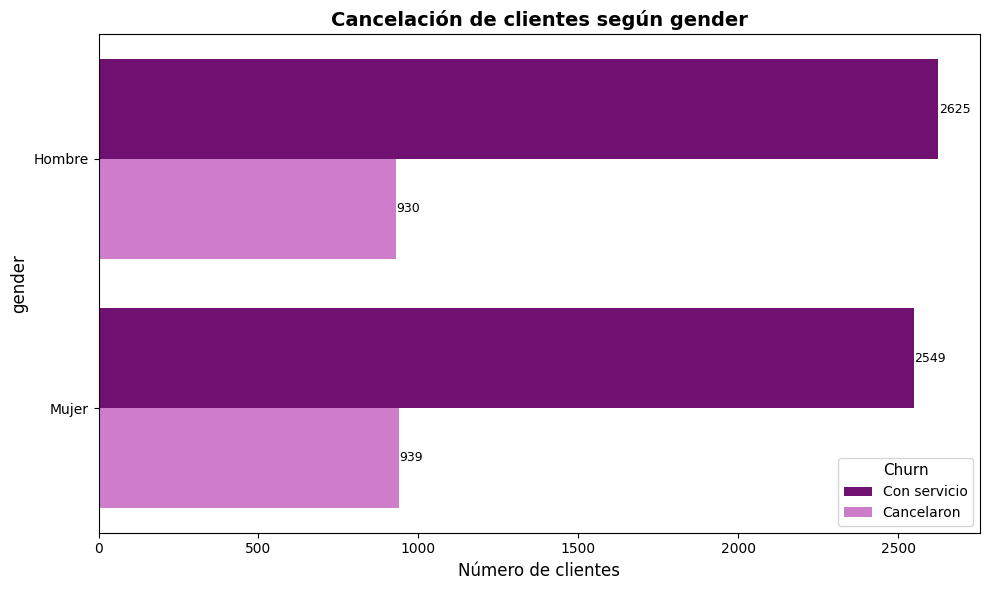


------------------------------------------------------------------------------------------------------------------------



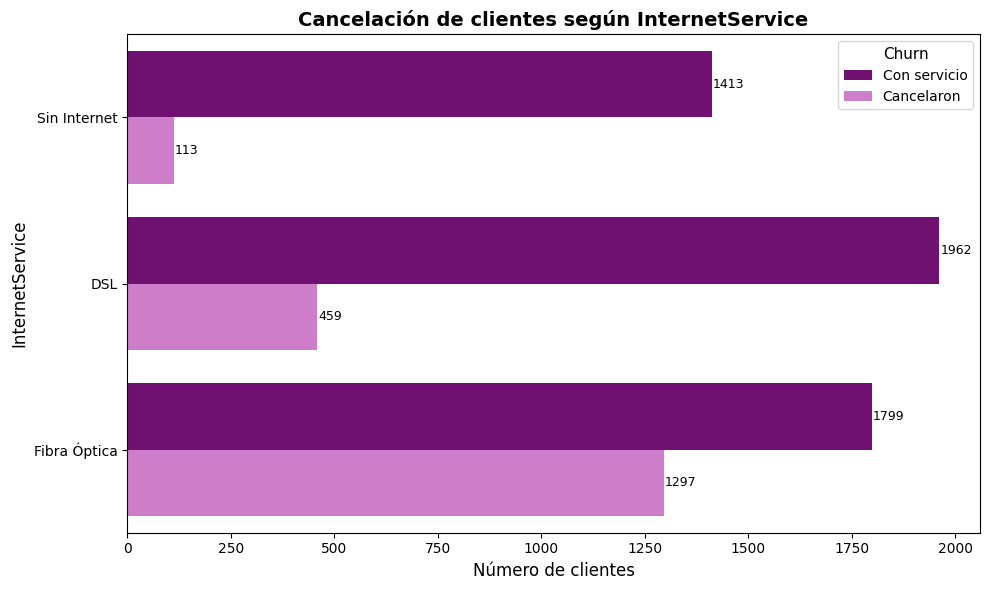


------------------------------------------------------------------------------------------------------------------------



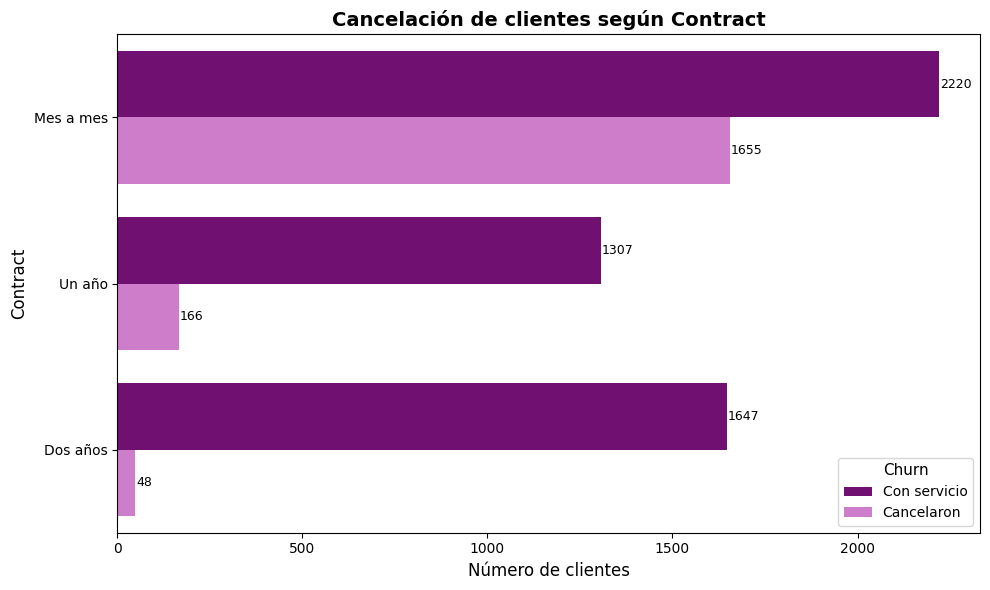


------------------------------------------------------------------------------------------------------------------------



In [85]:
def plot_churn_by_category(column, labels_dict=None):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Asegura que Churn tenga el orden deseado: 0 = Con servicio, 1 = Cancelaron
    sns.countplot(
        data=datos_limpios,
        y=column,
        hue='Churn',
        ax=ax,
        palette={0: 'purple', 1: 'orchid'},
        hue_order=[0, 1]
    )

    ax.set_title(f'Cancelación de clientes según {column}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Número de clientes', fontsize=12)
    ax.set_ylabel(column, fontsize=12)
    ax.legend(title='Churn', labels=['Con servicio', 'Cancelaron'], fontsize=10, title_fontsize=11)

    # Aplicar etiquetas personalizadas si existen
    if labels_dict:
        unique_vals = sorted(datos_limpios[column].dropna().unique())
        ax.set_yticks(range(len(unique_vals)))
        ax.set_yticklabels([labels_dict.get(val, val) for val in unique_vals])

    # Mostrar los valores exactos sobre las barras
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 2,
                p.get_y() + p.get_height() / 2,
                f'{int(width)}',
                va='center',
                fontsize=9,
                color='black'
            )

    # Guardar el gráfico
    fig.savefig(f'{column}_churn_distribution.png', transparent=False, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    print('\n' + '-'*120 + '\n')


# Diccionarios de etiquetas para columnas categóricas
labels_gender = {0: 'Hombre', 1: 'Mujer'}
labels_internet = {0: 'Sin Internet', 1: 'DSL', 2: 'Fibra Óptica'}
labels_contract = {0: 'Mes a mes', 1: 'Un año', 2: 'Dos años'}

# Llamadas a la función
plot_churn_by_category('gender', labels_gender)
plot_churn_by_category('InternetService', labels_internet)
plot_churn_by_category('Contract', labels_contract)


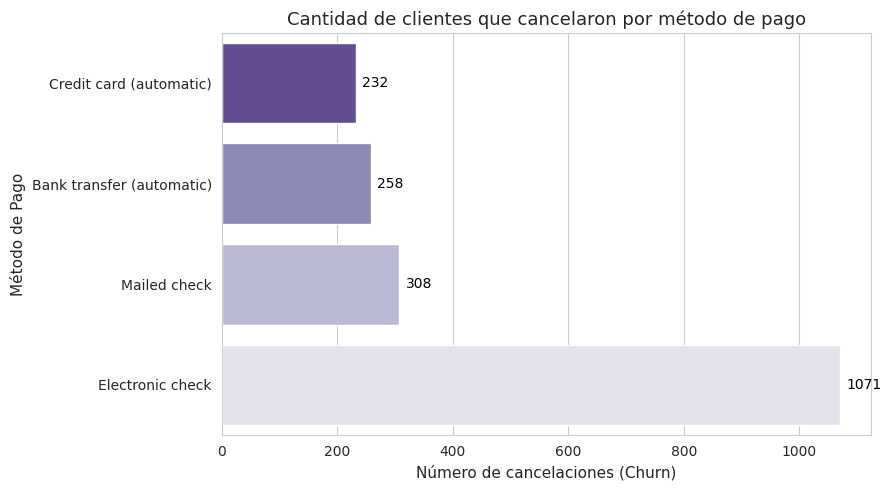

In [91]:
# Crear la figura y ejes
fig, ax = plt.subplots(figsize=(9, 5))

# Graficar el barplot
sns.barplot(
    data=df_churn,
    x='Cancelaciones',
    y='Método',
    hue='Método',
    dodge=False,
    palette='Purples_r',
    ax=ax,
    legend=False
)

# Añadir etiquetas con valores exactos al costado derecho de cada barra
for bar in ax.patches:
    valor = int(bar.get_width())
    y_pos = bar.get_y() + bar.get_height() / 2
    x_pos = bar.get_width()
    ax.text(x_pos + max(df_churn['Cancelaciones']) * 0.01, y_pos, f'{valor}', va='center', fontsize=10, color='black')

# Títulos y etiquetas
ax.set_title('Cantidad de clientes que cancelaron por método de pago', fontsize=13)
ax.set_xlabel('Número de cancelaciones (Churn)', fontsize=11)
ax.set_ylabel('Método de Pago', fontsize=11)

# Ajustar márgenes para que no se corte el texto
plt.tight_layout()
plt.savefig('cancelaciones_por_metodo.png', dpi=300, bbox_inches='tight')
plt.show()




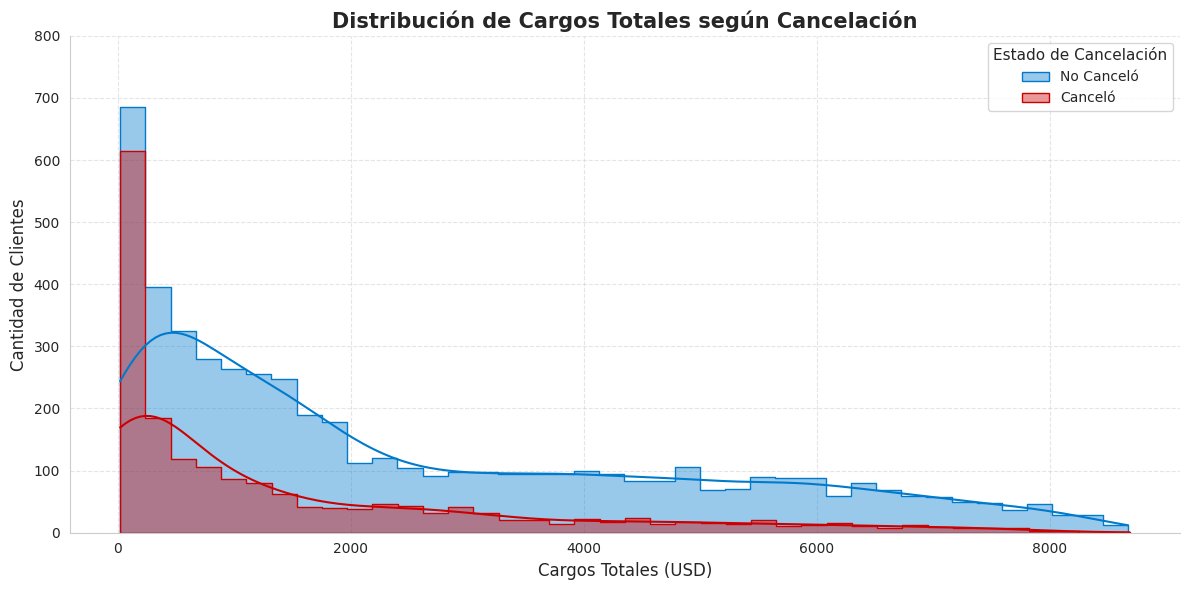

In [94]:
# Asegurarse de que las etiquetas estén correctamente mapeadas
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar manualmente por cada categoría
for label, color in zip(['No Canceló', 'Canceló'], ['#007acc', '#cc0000']):
    subset = datos_limpios[datos_limpios['Cancelacion'] == label]
    sns.histplot(
        data=subset,
        x='Charges.Total',
        kde=True,
        element='step',
        bins=40,
        ax=ax,
        label=label,
        color=color,
        alpha=0.4
    )

# Personalización de gráfico
ax.set_title('Distribución de Cargos Totales según Cancelación', fontsize=15, fontweight='bold')
ax.set_xlabel('Cargos Totales (USD)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.set_ylim(0, 800)  # Limitar eje Y de 0 a 800
ax.legend(title='Estado de Cancelación', title_fontsize=11, fontsize=10)
sns.despine()
ax.grid(True, linestyle='--', alpha=0.5)

# Guardar figura
fig.tight_layout()
fig.savefig('cancelacion_por_cargos.png', dpi=300, bbox_inches='tight')
plt.show()


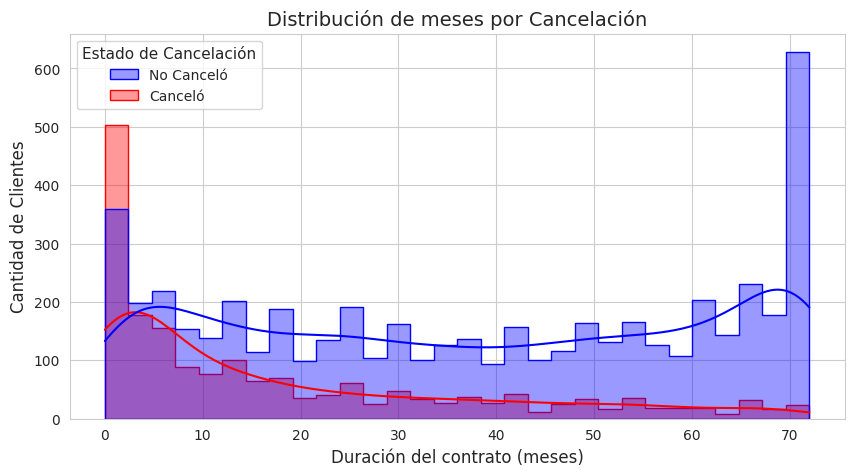

In [98]:
# Mapeamos los valores de Churn para mejor lectura
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 5))

# Crear el histograma con Seaborn
sns.histplot(
    data=datos_limpios,
    x='tenure',
    hue='Cancelacion',
    kde=True,
    element="step",
    stat='count',
    palette={'No Canceló': 'blue', 'Canceló': 'red'},
    bins=30,
    alpha=0.4,
    ax=ax
)

# Personalización de títulos y etiquetas
ax.set_title('Distribución de meses por Cancelación', fontsize=14)
ax.set_xlabel('Duración del contrato (meses)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

# Personalizar leyenda generada automáticamente
legend = ax.get_legend()
legend.set_title("Estado de Cancelación")
legend.get_title().set_fontsize(11)
for text in legend.get_texts():
    text.set_fontsize(10)

# Guardar la figura
fig.savefig('cancelacion_por_meses.png', transparent=False, dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()



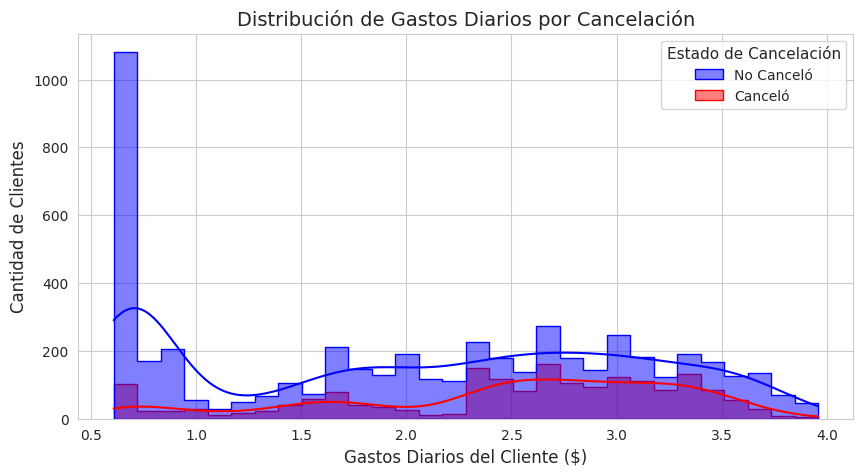

In [99]:
# Mapear los valores de cancelación
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar el histograma
sns.histplot(
    data=datos_limpios,
    x='Cuentas_Diarias',
    hue='Cancelacion',
    kde=True,
    element='step',
    stat='count',
    palette={'No Canceló': 'blue', 'Canceló': 'red'},
    bins=30,
    alpha=0.5,
    ax=ax
)

# Personalizar etiquetas y título
ax.set_title('Distribución de Gastos Diarios por Cancelación', fontsize=14)
ax.set_xlabel('Gastos Diarios del Cliente ($)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

# Personalizar la leyenda sin warnings
legend = ax.get_legend()
legend.set_title('Estado de Cancelación')
legend.get_title().set_fontsize(11)
for text in legend.get_texts():
    text.set_fontsize(10)

# Guardar figura en alta calidad
fig.savefig('cancelacion_porDias_gastos.png', transparent=False, dpi=300, bbox_inches='tight')

# Mostrar gráfico
plt.show()


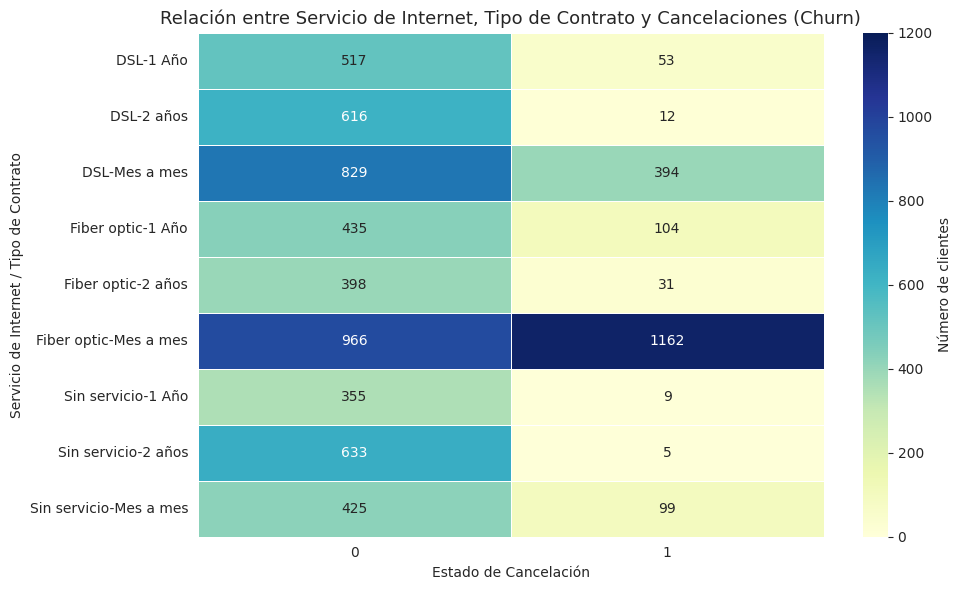

In [110]:
# Crear la tabla cruzada
tabla = pd.crosstab(
    [datos_limpios['InternetService'], datos_limpios['Contract']],
    datos_limpios['Churn']
)

# Renombrar columnas de Churn
tabla.rename(columns={'No': 'No Canceló', 'Yes': 'Canceló'}, inplace=True)

# Reindexar nombres de fila para mejor presentación
tabla.index.set_names(['Servicio de Internet', 'Tipo de Contrato'], inplace=True)

# Gráfico Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={"label": "Número de clientes"}, vmin=0, vmax=1200)

plt.title('Relación entre Servicio de Internet, Tipo de Contrato y Cancelaciones (Churn)', fontsize=13)
plt.ylabel('Servicio de Internet / Tipo de Contrato')
plt.xlabel('Estado de Cancelación')
plt.tight_layout()
plt.savefig('relacion_internet_contract_churn.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

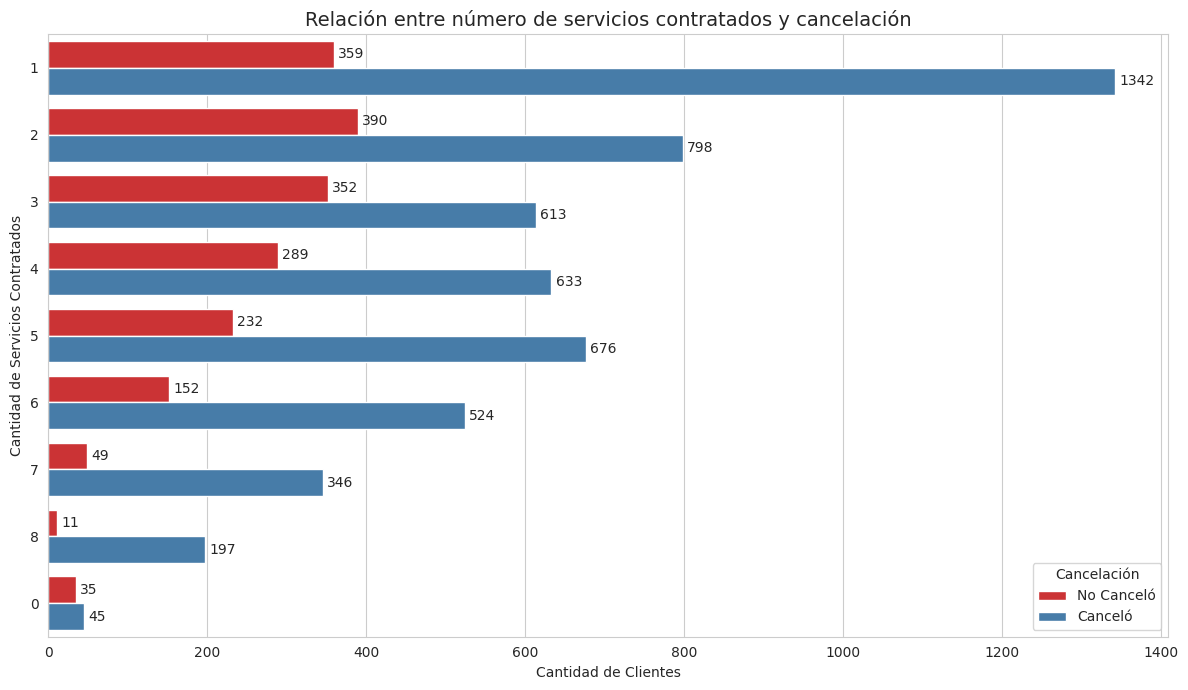

In [112]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    data=datos_limpios,
    y='ServiciosContratados',
    hue='Cancelacion',
    palette='Set1',
    order=datos_limpios['ServiciosContratados'].value_counts().index  # Ordena por frecuencia
)

plt.title('Relación entre número de servicios contratados y cancelación', fontsize=14)
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Cantidad de Servicios Contratados')
plt.legend(title='Cancelación', labels=['No Canceló', 'Canceló'])

# Añadir etiquetas a las barras
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.savefig('servicios_contratados_cancelados.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()


#📄Informe final

## **1. Introducción**

La empresa **Telecom X** enfrenta actualmente una alta tasa de cancelación de clientes (churn), situación que compromete directamente su flujo de ingresos recurrentes y su posicionamiento competitivo en el mercado de telecomunicaciones. El presente informe tiene como objetivo realizar un análisis integral de los datos históricos de clientes, con el fin de **identificar patrones y variables determinantes** que influyen en el abandono del servicio. A través de procesos de limpieza, transformación, análisis exploratorio y visualización, se busca extraer información clave que facilite la toma de decisiones estratégicas orientadas a **mitigar la pérdida de clientes y optimizar la retención**.


## **2. Limpieza y Tratamiento de Datos**

El análisis se sustentó sobre un proceso meticuloso de **preprocesamiento de datos**, el cual garantizó la integridad, consistencia y calidad de la información utilizada. Las etapas desarrolladas fueron:

* **Extracción:** Se recuperaron los datos utilizando una API RESTful provista por Telecom X, en formato JSON. Posteriormente, los registros fueron cargados a estructuras de tipo `DataFrame` para su manipulación en Python.

* **Transformación:** Se abordaron anomalías como espacios en blanco innecesarios, errores de capitalización en textos y valores atípicos. Las variables categóricas fueron **codificadas mediante técnicas de codificación binaria** y *label encoding* para facilitar su tratamiento en futuros modelos analíticos y predictivos.

* **Estandarización de variables:** Las columnas se renombraron para mantener una **convención de nomenclatura uniforme**, y se reestructuraron variables booleanas a formato numérico binario, por ejemplo:

```python
datos_limpios['EstadoCancelacion'] = datos_limpios['Churn'].replace({'Yes': 1, 'No': 0})
```

Estas tareas de limpieza son esenciales para minimizar el sesgo en el análisis y evitar errores en la interpretación de patrones.


## **3. Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio de datos permitió generar una comprensión profunda de las características del comportamiento de los clientes. Algunas visualizaciones y hallazgos clave incluyen:

* **Distribución de Cancelaciones:** Se identificó la proporción de clientes que cancelaron su servicio versus aquellos que permanecen activos. Esta visualización permitió cuantificar el nivel general de churn.

```python
conteo = datos_limpios['EstadoCancelacion'].value_counts()
conteo.plot(kind='bar', color=['blue', 'red'])
plt.title('Clientes que cancelaron vs. no cancelaron')
plt.show()
```

* **Evasión según características demográficas y contractuales:** Se evaluó el impacto del género, tipo de contrato (mensual vs. anual), y método de pago sobre la tasa de cancelación.

* **Variables numéricas relevantes:** Se analizaron relaciones cuantitativas entre variables como el **"Monthly Charges"**, **"Tenure"**, y el churn, revelando tendencias importantes.


## **4. Conclusiones e Insights Estratégicos**

Del estudio se desprenden diversas conclusiones de relevancia operativa y comercial:

* Los clientes con **contratos mensuales** exhiben una **tasa de cancelación significativamente superior** respecto a quienes optan por contratos a largo plazo. Esto sugiere menor fidelización en clientes sin compromiso de permanencia.

* Los usuarios con servicios de **Fibra Óptica** presentan una menor propensión a cancelar en comparación con aquellos que utilizan conexiones DSL. Este comportamiento podría estar vinculado a diferencias en la calidad del servicio percibido.

* El método de pago mediante **cheque electrónico (Electronic Check)** se asocia a una tasa de churn elevada, posiblemente por falta de automatización o comodidad, en contraste con medios como **tarjetas de crédito o débito automático**.

Estos insights son fundamentales para diseñar políticas de retención focalizadas y priorizar segmentos críticos con mayor riesgo de abandono.


## **5. Recomendaciones Estratégicas**

A partir del análisis de datos, se proponen las siguientes acciones para **reducir la tasa de cancelación y aumentar el ciclo de vida del cliente**:

1. **Programas de fidelización personalizados:** Ofrecer descuentos o beneficios exclusivos a los clientes con contratos mensuales para incentivar la transición a contratos de mayor duración.

2. **Mejora de infraestructura DSL:** Invertir en mejoras tecnológicas que aumenten la calidad del servicio DSL, acercándolo al estándar ofrecido por la fibra óptica.

3. **Campañas de migración de métodos de pago:** Promover activamente el uso de métodos de pago automatizados a través de promociones o bonificaciones, especialmente en clientes que utilizan Electronic Check.

4. **Modelos de predicción de cancelación:** Implementar modelos de *machine learning* supervisado (como árboles de decisión o regresión logística) que permitan anticipar la evasión con base en perfiles de riesgo.

5. **Seguimiento proactivo:** Diseñar campañas de retención con seguimiento automático para clientes con señales tempranas de insatisfacción o bajo nivel de uso del servicio.


## **6. Análisis Complementario: Correlación de Variables**

Como parte del análisis extendido, se realizó un estudio de **correlación estadística** entre variables numéricas relevantes. Esto permitió identificar asociaciones directas entre características cuantitativas y el estado de cancelación. Ejemplos destacados:

* Alta correlación negativa entre la **antigüedad del cliente (tenure)** y la evasión: a menor tiempo como cliente, mayor probabilidad de cancelación.

* Correlación positiva entre el **importe mensual facturado** y el churn: los clientes que pagan más por el servicio tienden a cancelar con mayor frecuencia, lo que podría estar relacionado con percepción de valor.

Para este análisis se utilizó la función `corr()` de Pandas y se representaron los resultados mediante matrices de calor (`heatmap`) y gráficos de dispersión para facilitar la interpretación visual de las relaciones.


## **7. Conclusión General**

Este análisis proporciona a Telecom X una visión clara de los factores estructurales y conductuales que explican el abandono de clientes. La adopción de estrategias basadas en datos, como segmentación inteligente y personalización de servicios, permitirá mejorar la experiencia del cliente y fortalecer la **retención en un mercado cada vez más competitivo**.

La implementación de modelos predictivos en conjunto con acciones tácticas derivadas de los insights obtenidos, podrá reducir significativamente la tasa de churn y aumentar el valor del cliente a largo plazo (*Customer Lifetime Value - CLV*).
